In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('customer_sales.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

/var/folders/nw/2f6dn1qs3yxcw52l9_mslwvm0000gn/T/ipykernel_6860/2777536599.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [ ]:
#Understand the Dataset

In [ ]:
'''
1. Are there any missing values in the dataset?

Order Date has 6 missing values
Customer Name has 1 missing value
Country has 1 missing value.
State has 4 missing values.
City has 4 missing values
Segment has 1 missing value
Ship Mode has 5 missing values
Category has 5 missing values
Discount has 7 missing values
Sales has 2 missing values
Profit and Quantity have 13 missing values


2. What is the Date Range?

2011-01-01 to 2014-12-31

3. Unique Customers in the dataset?

792 Unique Customers

4. Unique Orders in the dataset?

4117

5. Profile the data to give the standard descriptive statistics for the Sales field. What are the min, max,
variance, and standard deviations? (0.5)

Min: -110.0
Max: 206000.0
Variance: 10355997.72406914
Standard Deviation: 3218.073604513909


6. Do transaction amounts (sales) in general increase over time (perhaps due to inflation)? (1.5)


Yes, the transaction amount have a general increase over time. based on the line graph below.


'''

Order ID          0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             2
Profit           13
Quantity         13
dtype: int64
2011-01-01 to 2014-12-31
792
4117
Min: -110.0
Max: 206000.0
Variance: 10355997.72406914
Standard Deviation: 3218.073604513909
Top 10 maximum sales value
5246    206000.0
28      198000.0
868       6517.0
3196      5785.0
7590      5729.0
3975      5726.0
1970      5725.0
319       5340.0
711       5277.0
3593      5274.0
Name: Sales, dtype: float64
Order Date
2011-12-31    615533.0
2012-12-31    548880.0
2013-12-31    836018.0
2014-12-31    754796.0
Name: Sales, dtype: float64


<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
/var/folders/nw/2f6dn1qs3yxcw52l9_mslwvm0000gn/T/ipykernel_6860/1104550222.py:14: SyntaxWarning: invalid escape sequence '\$'
  df['Sales'] = pd.to_numeric(df['Sales'].replace({'\$': '', ',': ''}, regex=True))


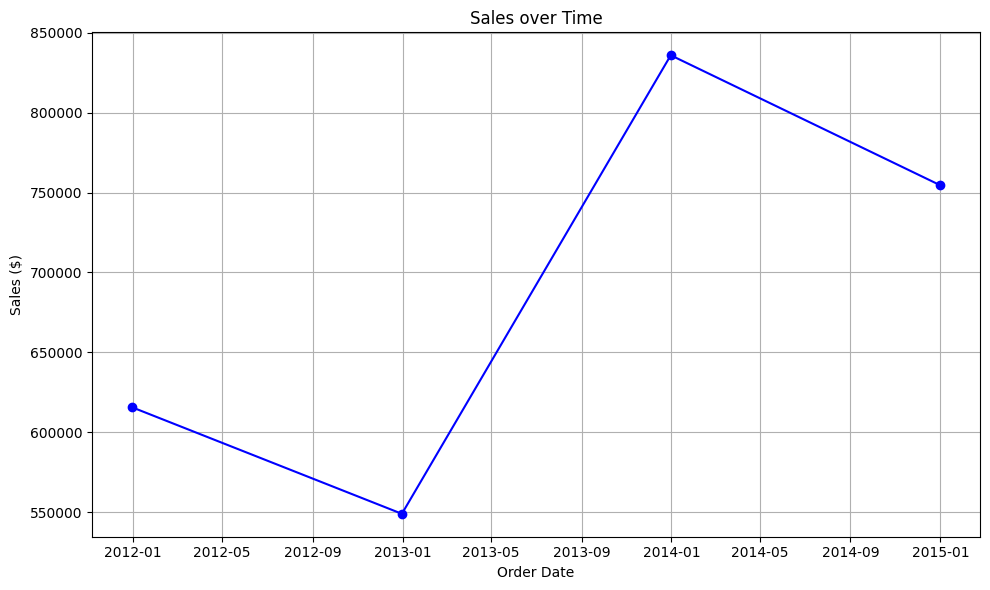

In [4]:
print(df.isna().sum()) #Finding Missing Values in the Dataset

#Getting the Date Range
valid_dates = df['Order Date'].dropna()
date_range = str(valid_dates.dt.date.min()) + ' to ' + str(valid_dates.dt.date.max())
print(date_range) 

#Getting the unique values
unique_customers = print(df['Customer Name'].nunique()) 
unique_orders = print(df['Order ID'].nunique())


#Statistical Analysis of Sales
df['Sales'] = pd.to_numeric(df['Sales'].replace({'\$': '', ',': ''}, regex=True))
min = df['Sales'].min()
max = df['Sales'].max()
variance = df['Sales'].var()
std_dev = df['Sales'].std()
print(f"Min: {min}")
print(f"Max: {max}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
top_10_sales = df['Sales'].nlargest(10)
print("Top 10 maximum sales value")
print(top_10_sales)


#Sales Over Time
df.set_index('Order Date', inplace = True)
yearly_sales = df.resample('YE').sum()

print(yearly_sales['Sales'])
plt.figure(figsize = (10,6))
plt.plot(yearly_sales['Sales'],marker = 'o',linestyle = '-',color = 'b')
plt.title('Sales over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Step 2 : Explore the Dataset

In [ ]:
'''
1. Are there any outliers or values that don’t make sense? You can use statistical tests to check for
outliers. Or, you can simply plot the histogram of the Sales and see if there is any value that
appears to be abnormal. (Hint, is there any value that appears to be abnormally large or small?
Could it be caused by bad entries (e.g. forgetting a decimal separator?). If there are outliers ,
how would you treat them? (4)
2. Does giving discounts increase sales and/or profits? Make a graph to show that. Comment on
what happens at 80% discount level, and what’s the optimum level for maximizing total profit.
(2)
3. What factors affect the sales the most? You can run a simple regression to understand the
impact. (2)

Solutions

1. Based on the histogram below. The data is right skewed, which means that due to some high spending customers, 
the mean has shifted to a higher number. The highest sales value is 206000.00
There are three negative sales, which could be an entering mistake. 
2011-03-15     Binney & Smith Pens, Blue       0.1 -110.0     4.0       1.0  
2014-10-16  Stanley Markers, Fluorescent       0.0  -70.0    24.0       3.0  
2014-10-16     Cardinal Index Tab, Clear       0.0  -47.0    20.0       7.0 

We can simply remove the negative sign to rectify this since sales cannot be negative.

There are also two values that are extremely high
2013-12-04    206000.0
2011-01-13    198000.0

We can remove these vales as they will right skew the data.

2. First I checked the correlation between Discount-Sales and Discount-Profit

Profit - Discount Correlation factor -0.35326176444654167
Sales-Discount Correlation factor -0.016209124146296428

since both values are negative, it implies that there is a negative relationship
between the two. but since its not absolute -1, the neg corr is not strong which
implies that they are negatively correlated but there are outliers as well.''

I also created a scatter plot between  Discount and Sales, and we can see that as the discount goes up
The frequency of sales goes down. 

We observe the same pattern for Profit as well. As the discounts go up, 
the net profit is going down. We can see that with increasing discounts the profit 
has gone below 0.


I can also do a simple group by on discuount by sales and profit and see 
both profit and sales at every discount level

Discount      Sales    Profit
0       0.0  1232140.0  312779.0
1       0.1   576440.0   95481.0
2       0.2   224257.0   16479.0
3       0.3     4952.0    -635.0
4       0.4   110980.0  -27598.0
5       0.5   168319.0  -87352.0
6       0.6    19849.0  -14949.0
7       0.7     9116.0  -10757.0
8       0.8      139.0    -426.0
9       0.9      555.0   -1925.0


based on the above analysis we can see that with increasing discounts
the profit seems to decrease and from 30% onwards the profit goes to negative
It looks like with increasing discount the profit goes negative because the 
increase in sales is not able to cover the loss in profit margins. 

At 80% discount level, we see a drastic decrease in both sales and profit. 
The profit still remains negative and follows the trend. 

The profit is maximized at 0% discount and then follows a downward trend
from there on, as we can see in the table above.

   Discount      Sales    Profit
0       0.0  1232140.0  312779.0


3. What factors affect Sales the most? Run a Simple Linear Regression to Check That.

Based on a Simple Linear Regression with Predicited Values as Sales (Y)
and Features (X) as Profit, Discount and Quantity. We can see the below observation

Coefficients:
    Feature  Coefficient
0  Discount   364.402885
1  Quantity    63.922963
2    Profit     1.153997

Intercept: -36.1719777565948
R² Score: 0.26633413152506946
Mean Squared Error: 156026.5665542411


Based on this we can see that Discount affects Sales the most as it has the highest coefficient value.

'''

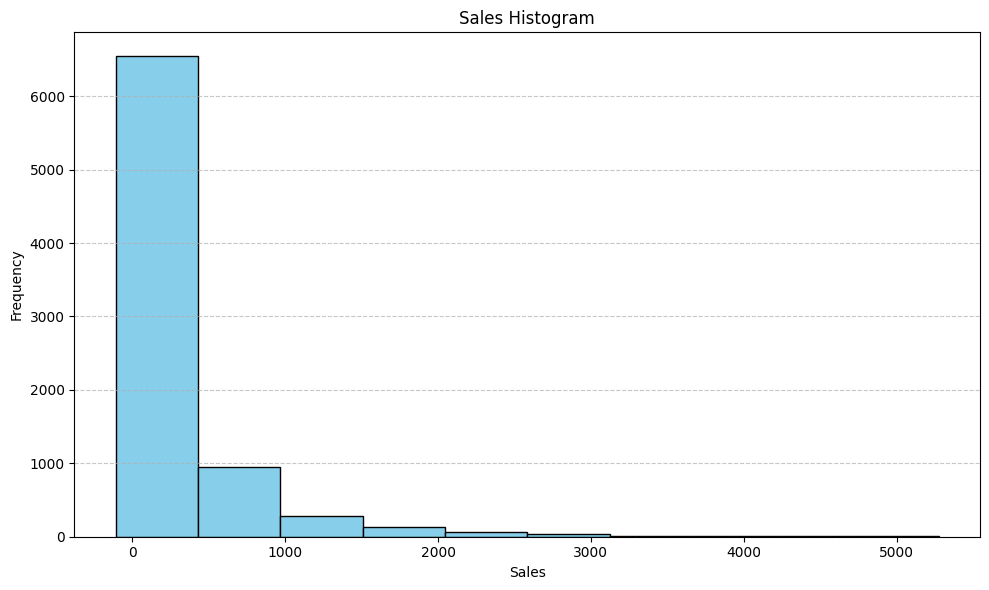

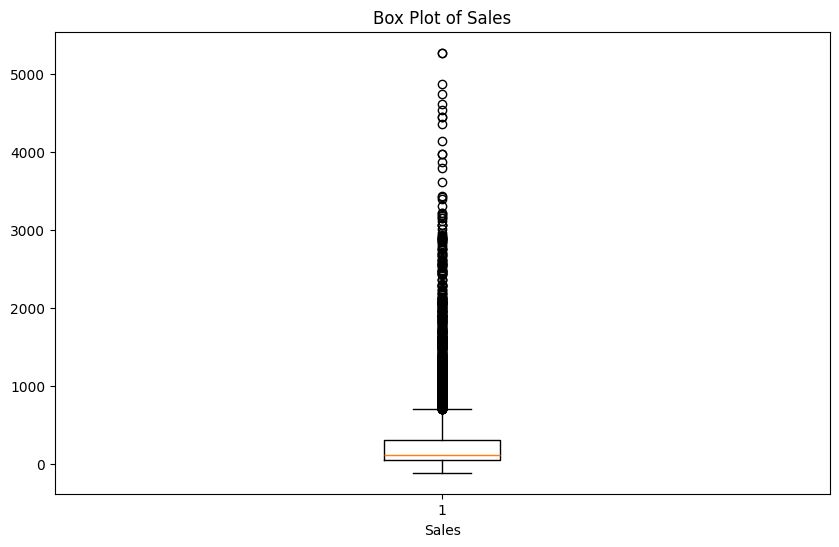

                   Order ID  Customer Name         Country  \
Order Date                                                   
2011-03-15  BN-2011-1399750  Wanda Wingert  United Kingdom   
2014-10-16  AZ-2014-6494772     Kian Sykes          France   
2014-10-16  AZ-2014-6494772     Kian Sykes          France   

                                 State        City   Region   Segment  \
Order Date                                                              
2011-03-15                     England      London    North  Consumer   
2014-10-16  Provence-Alpes-Côte d'Azur  Carpentras  Central  Consumer   
2014-10-16  Provence-Alpes-Côte d'Azur  Carpentras  Central  Consumer   

            Ship Mode         Category Sub-Category  \
Order Date                                            
2011-03-15  Immediate  Office Supplies          Art   
2014-10-16   Priority  Office Supplies          Art   
2014-10-16   Priority  Office Supplies      Binders   

                            Product Name  Disco

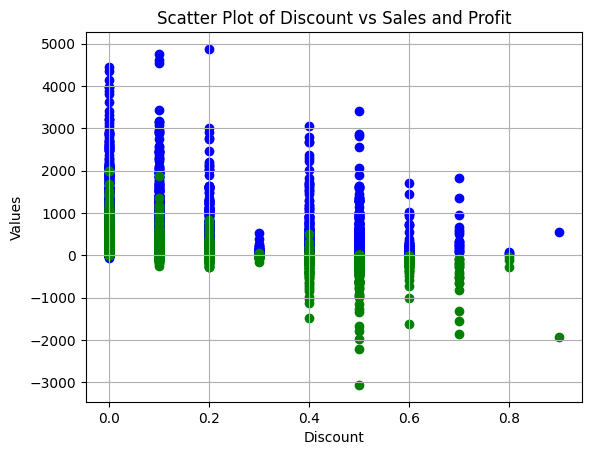

                   Order ID Customer Name         Country    State  \
Order Date                                                           
2012-01-20  BN-2012-5319905   Ella Harrhy  United Kingdom  England   
2013-08-06  AZ-2013-5998072    Eva Arnold  United Kingdom  England   
2014-12-20   BN-2014-323564  Lucas Warren  United Kingdom  England   

                  City Region    Segment Ship Mode   Category Sub-Category  \
Order Date                                                                   
2012-01-20  Birmingham  North  Corporate   Economy  Furniture  Furnishings   
2013-08-06   Sheffield  North   Consumer  Priority  Furniture  Furnishings   
2014-12-20   Sheffield  North   Consumer   Economy  Furniture  Furnishings   

                         Product Name  Discount  Sales  Profit  Quantity  
Order Date                                                                
2012-01-20     Deflect-O Clock, Black       0.8   70.0  -271.0       7.0  
2013-08-06  Eldon Light Bulb, Dur

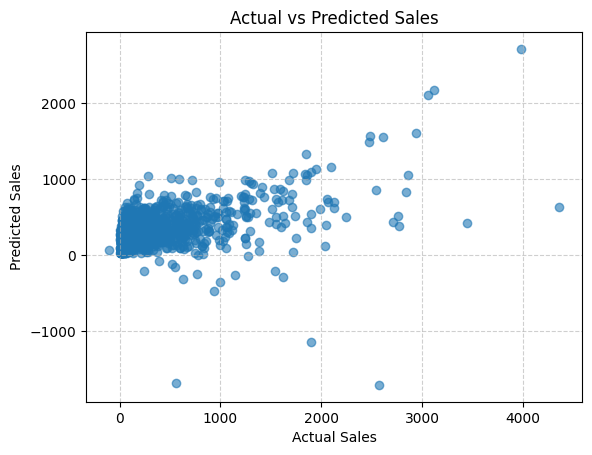

In [9]:
#Box Plot

plt.figure(figsize= (10,6))
plt.hist(df['Sales'],bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Sales Histogram')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,6))
plt.boxplot(df['Sales'].dropna(), vert = True)
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()

print(df[df['Sales'] < 0])

top2sales = df['Sales'].nlargest(2)
df = df[~df['Sales'].isin(top2sales)]


import matplotlib.pyplot as plt
plt.scatter(df['Discount'], df['Sales'], color='blue',label = 'Discount vs Sales')
plt.scatter(df['Discount'], df['Profit'], color = 'green', label = 'Discount vs Profit')

plt.xlabel('Discount')
plt.ylabel('Values')
plt.title('Scatter Plot of Discount vs Sales and Profit')
plt.grid(True)
plt.show()

#We can clearly see from the scatter plot that both sales and profit
#have gone down. 

#Analysis to see what happens at 80% discount level. 

discount_80 = df[df['Discount'] == 0.8]
print(discount_80)
discount_group_by = df.groupby('Discount')[['Sales', 'Profit']].sum().reset_index()
print(discount_group_by)
max_profit = discount_group_by[discount_group_by['Profit'] == discount_group_by['Profit'].max()]
print('Optimum Discount Level for maximizing profit')
print(max_profit)

#Running a Simple Linear Regression Model to see what factors affect Sales the most.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df_regression = df.dropna()

X = df_regression[['Discount', 'Quantity', 'Profit']]
y = df_regression['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the coefficients and metrics
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Coefficients:")
print(coefficients)
print(f"\nIntercept: {model.intercept_}")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")





In [16]:
#Step 3

'''
Some of the underlying customers are brand new and others have been customers for almost five
years. The newer customers will have (generally) spent less on average than the old ones. You need to
separate the customers into groups based on how long ago they were acquired (e.g. customers
acquired in 2010, vs customers acquired in 2011, ...). First, assign customers into different groups based
on the date of acquisition (origin year). For instance, the earliest transaction date that can be found for
customer 2 in the dataset is 5/15/12. Then we assign customer 2 into group 2012 as this customer was
acquired in the year 2012. Write Python scripts to assign the appropriate origin year to all customers,


   Origin Year  Quantity
0       2011.0   20579.0
1       2012.0    7512.0
2       2013.0    1939.0
3       2014.0     154.0


'''
df_reset = df.reset_index()

earliest_order = df_reset.groupby('Customer Name')['Order Date'].min().reset_index()

earliest_order.rename(columns = {'Order Date' : 'AcquisitionDate'}, inplace = True)

earliest_order['Origin Year'] = earliest_order['AcquisitionDate'].dt.year

df_reset = df_reset.merge(earliest_order[['Customer Name','Origin Year']],on = 'Customer Name', how = 'left')

df_final = df_reset.set_index('Order Date')

print(df_final)
customer_origin_year = df_final.groupby('Origin Year')['Quantity'].sum().reset_index()
print(customer_origin_year)





                   Order ID     Customer Name         Country  \
Order Date                                                      
2011-01-01  BN-2011-7407039        Ruby Patel          Sweden   
2011-01-03  AZ-2011-9050313    Summer Hayward  United Kingdom   
2011-01-04  AZ-2011-6674300  Devin Huddleston          France   
2011-01-04  BN-2011-2819714       Mary Parker  United Kingdom   
2011-01-04  BN-2011-2819714       Mary Parker  United Kingdom   
...                     ...               ...             ...   
2014-12-31   AZ-2014-766953      Jose Gambino  United Kingdom   
2014-12-31  BN-2014-4140795   Daniel Hamilton     Netherlands   
2014-12-31  BN-2014-4140795   Daniel Hamilton     Netherlands   
2014-12-31  BN-2014-4140795   Daniel Hamilton     Netherlands   
2014-12-31   AZ-2014-766953      Jose Gambino  United Kingdom   

                           State        City   Region      Segment  \
Order Date                                                           
2011-01-01    

In [17]:
#Step 4
'''
Now, calculate the cumulative transaction amounts (sales) for customers in each group of origin year.
Your output should be something similar to the table below. In the table, each row represents the
cumulative amount for customers of each origin year. Each column represents the cumulative amounts
at age 12, 24, 36, 48, 60, and 72 months. Note: age represents the time elapsed since the start of each
customer group.


CustomerAgeMonths        0         12         24         36
Origin Year                                                
2011.0             400367.0  736292.0  1102198.0  1578495.0
2012.0             201445.0  370930.0   566300.0        0.0
2013.0              83627.0  148919.0        0.0        0.0
2014.0              12108.0       0.0        0.0        0.0

In the above table, 0 is the sales in the year of acquistion, 
then 12 is the cumulative for the next 12 months and so on..

'''
# Step 1: Extract transaction year and calculate customer age in months
df_reset['TransactionYear'] = pd.to_datetime(df_reset['Order Date']).dt.year
df_reset['CustomerAgeMonths'] = (df_reset['TransactionYear'] - df_reset['Origin Year']) * 12

# Step 2: Group by OriginYear and Age in Months, then aggregate sales
grouped = df_reset.groupby(['Origin Year', 'CustomerAgeMonths'])['Sales'].sum().reset_index()

# Step 3: Calculate cumulative sales for each OriginYear group
grouped['CumulativeSales'] = grouped.groupby('Origin Year')['Sales'].cumsum()

# Step 4: Pivot table for the desired format
pivot_table = grouped.pivot(index='Origin Year', columns='CustomerAgeMonths', values='CumulativeSales')

# Step 5: Reformat the table to show specific age columns (12, 24, ..., 72 months)
age_columns = [0,12, 24, 36]
pivot_table = pivot_table.reindex(columns=age_columns, fill_value=0)
pivot_table = pivot_table.fillna(0)

# Display the final table
print(pivot_table)



CustomerAgeMonths        0         12         24         36
Origin Year                                                
2011.0             400367.0  736292.0  1102198.0  1578495.0
2012.0             201445.0  370930.0   566300.0        0.0
2013.0              83627.0  148919.0        0.0        0.0
2014.0              12108.0       0.0        0.0        0.0


In [18]:
#Step 5

'''
Again using Python, calculate the number of new customers by origin year in each year. Your
output should be similar to the table below (again, you will have slightly different numbers
because the input data is different for the assignment):

  Origin Year    0   12   36   48
0       2011.0  492  492  492  492
1       2012.0  204  204  204  204
2       2013.0   79   79   79   79
3       2014.0   17   17   17   17

They acquired 
492 customers in 2011
204 in 2012
2013 in 79 
17 in 2014

'''

# Step 1: Group by OriginYear and count unique customers
origin_year_customers = df_reset.groupby('Origin Year')['Customer Name'].nunique().reset_index()


# Step 2: Create a table where each value in the row is the same (total new customers for that OriginYear)
origin_year_customers['NewCustomers'] = origin_year_customers['Customer Name']
origin_year_table = origin_year_customers[['Origin Year', 'NewCustomers']]

print(origin_year_table)

# Step 3: Duplicate the same value for multiple columns (e.g., 12, 24, 36, 48, 60, 72 months)
columns = ['0', '12', '24', '36']
for col in columns:
    origin_year_table[col] = origin_year_table['NewCustomers']

# Step 4: Drop the unnecessary "NewCustomers" column
origin_year_table = origin_year_table.drop('NewCustomers', axis=1)

origin_year_table.columns.name = "CustomerAgeMonths"
origin_year_table.set_index("Origin Year", inplace = True)
origin_year_table.columns = origin_year_table.columns.astype(int)
# Print the table
print(origin_year_table)


   Origin Year  NewCustomers
0       2011.0           492
1       2012.0           204
2       2013.0            79
3       2014.0            17
CustomerAgeMonths   0    12   24   36
Origin Year                          
2011.0             492  492  492  492
2012.0             204  204  204  204
2013.0              79   79   79   79
2014.0              17   17   17   17


CustomerAgeMonths           0            12           24           36
Origin Year                                                          
2011.0              813.754065  1496.528455  2240.239837  3208.323171
2012.0              987.475490  1818.284314  2775.980392     0.000000
2013.0             1058.569620  1885.050633     0.000000     0.000000
2014.0              712.235294     0.000000     0.000000     0.000000


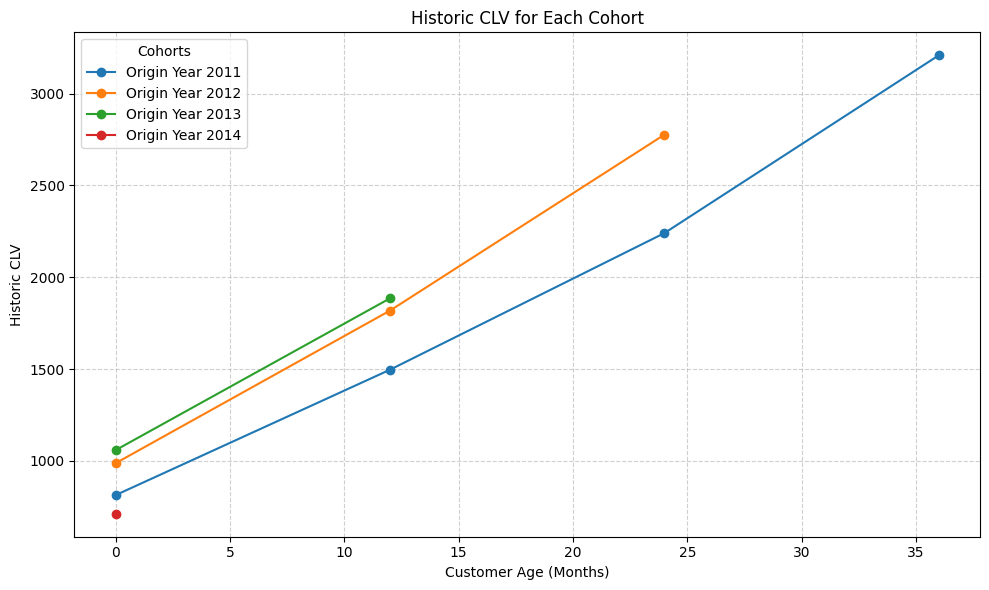

In [14]:
#Step 6

'''
Finally, you are ready to calculate the Historic CLV. Dividing the Amount.cmltv triangle by the
NewCustomers.cmltv triangle will give us annual measurements of the cumulative amount
spent per customer in each group of annually acquired customers. This is also known as Historic
CLV.

CustomerAgeMonths           0            12           24           36
Origin Year                                                          
2011.0              813.754065  1496.528455  2240.239837  3208.323171
2012.0              987.475490  1818.284314  2775.980392     0.000000
2013.0             1058.569620  1885.050633     0.000000     0.000000
2014.0              712.235294     0.000000     0.000000     0.000000

'''

result = pivot_table / origin_year_table


print(result)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Loop through the result index (origin years)
for year in result.index:
    # Filter the data to exclude zero values
    filtered_data = result.loc[year][result.loc[year] > 0]
    
    # Plot the filtered data
    if not filtered_data.empty:
        plt.plot(filtered_data.index, filtered_data, marker='o', label=f"Origin Year {int(year)}")

# Add labels, title, and legend
plt.xlabel("Customer Age (Months)")
plt.ylabel("Historic CLV")
plt.title("Historic CLV for Each Cohort")
plt.legend(title="Cohorts", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#Step 6
'''
At this point, we’d like to combine all of our data to create a single curve of Historic CLV. A simple, but
effective approach to doing this is to take a volume-weighted average of the Historic CLV for each
group at each Age, weighted by the number of customers in each group.
'''

In [21]:
# Map Quantity to the historic_clv DataFrame
result['Quantity'] = result.index.map(
    customer_origin_year.set_index('Origin Year')['Quantity']
)

# Calculate volume-weighted average for each customer age
weighted_clv = []

for age in result.columns[:-1]:  # Skip 'Quantity' column
    
    numerator = sum(result[age] * result['Quantity'])
    
    denominator = sum(result['Quantity'][result[age] > 0])
    
    
    weighted_clv.append(numerator / denominator if denominator > 0 else 0)


# Output weighted_clv for reference
print("Volume-Weighted Historic CLV:", weighted_clv)








Volume-Weighted Historic CLV: [872.1975720841999, 1602.102032075321, 2383.505760553326, 3208.3231707317073]


In [25]:

#Step 7

'''
Interpret the historic CLV and briefly answer the following questions: -
1. How much have customers acquired in 2011 spent to date?
2. Does each group of customers exhibit similar or different patterns of spending? What’s the
implication for the business?


1. The customers have spent around 1578725.0 to date, the ones who were acquired in 2011.

2. Older cohorts (e.g., 2011, 2012) have higher and more sustained CLV values, indicating strong long-term engagement.
   Newer cohorts (2013, 2014) show rapid declines in spending, suggesting potential retention issues or less loyal customer bases.

   The decline in CLV for newer cohorts could indicate that the business is acquiring lower-value customers or that market conditions have changed.
   The business should investigate the reasons behind this trend (e.g., changes in product quality, competition, or customer acquisition strategies).

   For high-value cohorts like 2011 and 2012, focus on upselling or loyalty programs to maximize lifetime value.
   For newer cohorts, implement strategies like onboarding programs, personalized engagement, or feedback loops to improve retention and increase spending.
'''

sales_so_far = df_final.groupby('Origin Year')['Sales'].sum().reset_index()
print(sales_so_far)




   Origin Year      Sales
0       2011.0  1578725.0
1       2012.0   566300.0
2       2013.0   149220.0
3       2014.0    12108.0
